Importing the libraries

In [15]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from pprint import pprint

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV


Exploratory Data Analysis

In [2]:
dataframe = pd.read_csv('/content/Housing.csv')

# printing first 5 columns
print(dataframe.head())

# printing the dimensions of the dataframe
print(dataframe.shape)

# Checking for missing values
print(dataframe.isnull().sum())

#data info
print(dataframe.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)
price               0
area                0
bedrooms            0
bathrooms           0
s

Feature Engineering

In [3]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
dataframe['mainroad'] = label_encoder.fit_transform(dataframe['mainroad'])
dataframe['guestroom'] = label_encoder.fit_transform(dataframe['guestroom'])
dataframe['basement'] = label_encoder.fit_transform(dataframe['basement'])
dataframe['hotwaterheating'] = label_encoder.fit_transform(dataframe['hotwaterheating'])
dataframe['airconditioning'] = label_encoder.fit_transform(dataframe['airconditioning'])
dataframe['prefarea'] = label_encoder.fit_transform(dataframe['prefarea'])
dataframe['furnishingstatus'] = ordinal_encoder.fit_transform(dataframe[['furnishingstatus']])

Histogram for the distribution

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

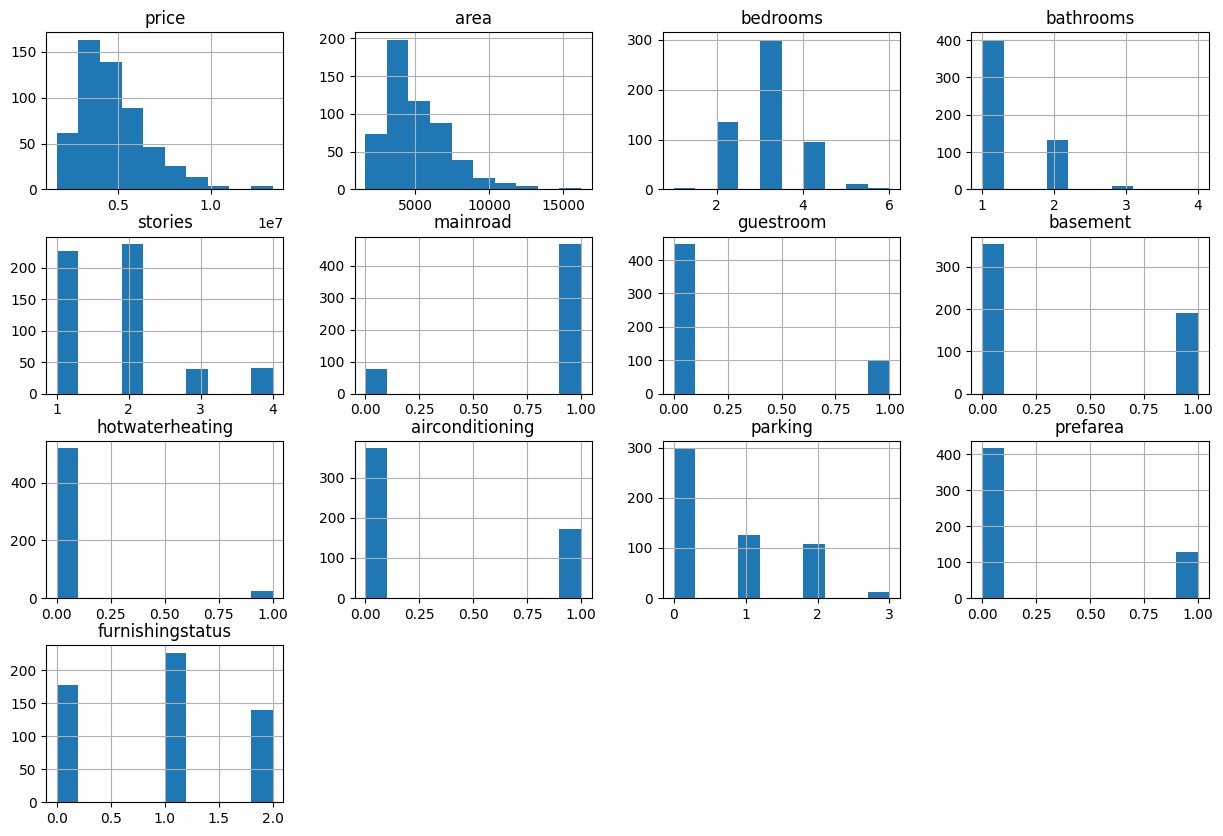

In [4]:
dataframe.hist(figsize=(15,10))

HeatMap for Correlation

<Axes: >

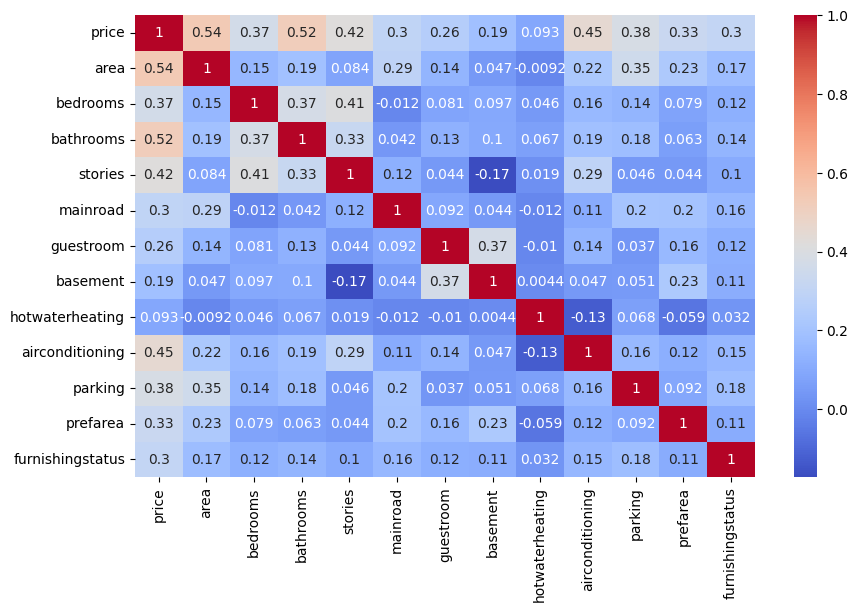

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')

Splitting training & testing data

In [6]:
X = dataframe.drop(['price'],axis=1)
Y = dataframe["price"]
print(X)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=69)


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

Feature Scaling

In [7]:
scalar = StandardScaler()
scalar.fit(train_x.values)
std_train_x = scalar.transform(train_x.values)
std_test_x = scalar.transform(test_x.values)

Linear Regression

In [34]:
# Train the Linear Regression model
model1 = LinearRegression()
model1.fit(std_train_x, train_y)

# Predictions on training data
predict_y_train = model1.predict(std_train_x)

# Predictions on testing data
predict_y_test = model1.predict(std_test_x)

# Performance on Training Data
print("Training Data Performance:")
score_model1_1 = metrics.r2_score(train_y, predict_y_train)
print("R squared error for Linear Regression (Training): ", score_model1_1)

score_model1_2 = metrics.mean_absolute_error(train_y, predict_y_train)
print('Mean Absolute Error for Linear Regression (Training): ', score_model1_2)

score_model1_3 = metrics.mean_squared_error(train_y, predict_y_train)
print('Mean Squared Error for Linear Regression (Training): ', score_model1_3)

# Performance on Testing Data
print("\nTesting Data Performance:")
score_model1_1_test = metrics.r2_score(test_y, predict_y_test)
print("R squared error for Linear Regression (Testing): ", score_model1_1_test)

score_model1_2_test = metrics.mean_absolute_error(test_y, predict_y_test)
print('Mean Absolute Error for Linear Regression (Testing): ', score_model1_2_test)

score_model1_3_test = metrics.mean_squared_error(test_y, predict_y_test)
print('Mean Squared Error for Linear Regression (Testing): ', score_model1_3_test)


Training Data Performance:
R squared error for Linear Regression (Training):  0.7037314596650812
Mean Absolute Error for Linear Regression (Training):  730458.4318636302
Mean Squared Error for Linear Regression (Training):  909681965974.8021

Testing Data Performance:
R squared error for Linear Regression (Testing):  0.5938618387737352
Mean Absolute Error for Linear Regression (Testing):  940239.2994190837
Mean Squared Error for Linear Regression (Testing):  2039099030865.844


Ridge and Lasso Regularization

In [35]:
ridge_model = Ridge()
lasso_model = Lasso()

In [36]:
ridge_model.fit(std_train_x, train_y)

Ridge()

In [37]:
ridge_predictions_train = ridge_model.predict(std_train_x)
ridge_predictions_test = ridge_model.predict(std_test_x)
print("Ridge Regression R squared error for training data: ", metrics.r2_score(train_y, ridge_predictions_train))
print("Ridge Regression R squared error for testing data: ", metrics.r2_score(test_y, ridge_predictions_test))

Ridge Regression R squared error for training data:  0.7037303111158728
Ridge Regression R squared error for testing data:  0.5937871769563358


In [38]:
lasso_model.fit(std_train_x, train_y)

Lasso()

In [39]:
lasso_predictions_train = lasso_model.predict(std_train_x)
lasso_predictions_test = lasso_model.predict(std_test_x)
print("Lasso Regression R squared error for training data: ", metrics.r2_score(train_y, lasso_predictions_train))
print("Lasso Regression R squared error for testing data: ", metrics.r2_score(test_y, lasso_predictions_test))

Lasso Regression R squared error for training data:  0.7037314596631417
Lasso Regression R squared error for testing data:  0.5938615249023624


In [40]:
alpha_values = {'alpha':np.logspace(-6,6,100)}

In [41]:
ridge_grid = GridSearchCV(Ridge(),param_grid=alpha_values,scoring='neg_mean_squared_error',cv=5)
ridge_grid.fit(std_train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2....
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [42]:
lasso_grid = GridSearchCV(Lasso(),param_grid=alpha_values,scoring='neg_mean_squared_error',cv=5)
lasso_grid.fit(std_train_x, train_y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2....
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [43]:
ridge_grid.best_params_

{'alpha': 18.738174228603867}

In [44]:
lasso_grid.best_params_

{'alpha': 1e-06}

In [45]:
ridge_predictions_train = ridge_grid.predict(std_train_x)
ridge_predictions_test = ridge_grid.predict(std_test_x)
print("Ridge Regression R squared error for training data: ", metrics.r2_score(train_y, ridge_predictions_train))
print("Ridge Regression R squared error for testing data: ", metrics.r2_score(test_y, ridge_predictions_test))

Ridge Regression R squared error for training data:  0.7033581056204503
Ridge Regression R squared error for testing data:  0.5922209008795181


In [46]:
lasso_predictions_train = lasso_grid.predict(std_train_x)
lasso_predictions_test = lasso_grid.predict(std_test_x)
print("Lasso Regression R squared error for training data: ", metrics.r2_score(train_y, lasso_predictions_train))
print("Lasso Regression R squared error for testing data: ", metrics.r2_score(test_y, lasso_predictions_test))

Lasso Regression R squared error for training data:  0.7037314596650812
Lasso Regression R squared error for testing data:  0.5938618387734259


In [51]:
score_ridge_r2_train = metrics.r2_score(train_y, ridge_predictions_train)
score_ridge_mae_train = metrics.mean_absolute_error(train_y, ridge_predictions_train)
score_ridge_mse_train = metrics.mean_squared_error(train_y, ridge_predictions_train)

# Ridge Regression - Testing Data
score_ridge_r2_test = metrics.r2_score(test_y, ridge_predictions_test)
score_ridge_mae_test = metrics.mean_absolute_error(test_y, ridge_predictions_test)
score_ridge_mse_test = metrics.mean_squared_error(test_y, ridge_predictions_test)

# Print the scores for Ridge Regression
print("Ridge Regression - Training Data:")
print(f"R²: {score_ridge_r2_train}, MAE: {score_ridge_mae_train}, MSE: {score_ridge_mse_train}")

print("\nRidge Regression - Testing Data:")
print(f"R²: {score_ridge_r2_test}, MAE: {score_ridge_mae_test}, MSE: {score_ridge_mse_test}")

Ridge Regression - Training Data:
R²: 0.7033581056204503, MAE: 728868.9555644401, MSE: 910828336227.0754

Ridge Regression - Testing Data:
R²: 0.5922209008795181, MAE: 937456.5474145076, MSE: 2047337692457.5215


In [52]:
# Lasso Regression - Training Data
score_lasso_r2_train = metrics.r2_score(train_y, lasso_predictions_train)
score_lasso_mae_train = metrics.mean_absolute_error(train_y, lasso_predictions_train)
score_lasso_mse_train = metrics.mean_squared_error(train_y, lasso_predictions_train)

# Lasso Regression - Testing Data
score_lasso_r2_test = metrics.r2_score(test_y, lasso_predictions_test)
score_lasso_mae_test = metrics.mean_absolute_error(test_y, lasso_predictions_test)
score_lasso_mse_test = metrics.mean_squared_error(test_y, lasso_predictions_test)

# Print the scores for Lasso Regression
print("Lasso Regression - Training Data:")
print(f"R²: {score_lasso_r2_train}, MAE: {score_lasso_mae_train}, MSE: {score_lasso_mse_train}")

print("\nLasso Regression - Testing Data:")
print(f"R²: {score_lasso_r2_test}, MAE: {score_lasso_mae_test}, MSE: {score_lasso_mse_test}")


Lasso Regression - Training Data:
R²: 0.7037314596650812, MAE: 730458.4318634353, MSE: 909681965974.8021

Lasso Regression - Testing Data:
R²: 0.5938618387734259, MAE: 940239.2994190255, MSE: 2039099030867.397


PCA (Principal Component Analysis)

In [47]:
pca = PCA(0.95)
print(std_train_x.shape)
print(std_train_x)
X_pca = pca.fit_transform(std_train_x)
print(X_pca.shape)
print(X_pca)
# variance ratio tells how much percent of information is retained from each column
pca.explained_variance_ratio_

(436, 12)
[[-0.75911881 -2.68329329 -0.56433639 ... -0.81642773 -0.53491653
   1.40371723]
 [ 0.96404576  0.05015501 -0.56433639 ...  0.33929464  1.86945055
   1.40371723]
 [-0.13877956  0.05015501 -0.56433639 ... -0.81642773 -0.53491653
  -1.24572308]
 ...
 [-0.53855374 -1.31656914 -0.56433639 ... -0.81642773 -0.53491653
  -1.24572308]
 [ 0.13692677  1.41687917 -0.56433639 ... -0.81642773 -0.53491653
   0.07899707]
 [ 0.4126331   0.05015501  1.41994317 ...  0.33929464 -0.53491653
   0.07899707]]
(436, 11)
[[-2.04883529 -0.96310999 -1.19222733 ... -0.43034162  1.30520096
   0.57233871]
 [ 1.84166922 -2.41327657  0.89259031 ...  1.33219353  0.11965629
   0.9738045 ]
 [-0.63555551 -1.79988564  1.76048653 ...  0.82739315 -0.51009702
  -0.40679449]
 ...
 [-3.00438166  0.22871729  0.48363218 ...  0.27220431  0.79546351
   0.21684921]
 [-0.29849649  0.96094059 -0.19235634 ...  1.16154189 -0.50440276
  -0.81802486]
 [ 1.78563795  0.22558357  0.47494752 ...  0.34279326  0.80361832
   0.5897555

array([0.1992571 , 0.13013082, 0.10882459, 0.09254105, 0.07712747,
       0.07234783, 0.06994201, 0.06139763, 0.05403647, 0.05291294,
       0.04772397])

Random Forest Regressor with Hyperparameter Tuning

In [48]:
model2 = RandomForestRegressor(n_estimators=20, random_state=0)

#printing the parameters using in random forest
pprint(model2.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model2,param_distributions = random_grid, n_iter = 20, cv = 3, random_state=42)
rf_random.fit(train_x, train_y)
print(rf_random.best_params_)

# Predict using the best model
model2_refined = rf_random.best_estimator_

#As random forest doesn't require standard scaling we haven't used here
model2_refined.fit(train_x.values, train_y.values)

predict_y_model2 = model2_refined.predict(train_x.values)

# R squared error for RANDOM FOREST REGRESSOR
score_model2_1 = metrics.r2_score(train_y, predict_y_model2)
print("R squared error for RANDOM FOREST REGRESSOR: ", score_model2_1)

# Mean Absolute Error for RANDOM FOREST REGRESSOR
score_model2_2 = metrics.mean_absolute_error(train_y, predict_y_model2)
print('Mean Absolute Error for RANDOM FOREST REGRESSOR: ', score_model2_2)

# Mean Squared Error for RANDOM FOREST REGRESSOR
score_model2_3 = metrics.mean_absolute_error(train_y, predict_y_model2)
print('Mean Squared Error for RANDOM FOREST REGRESSOR: ', score_model2_3)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
R squared error for RANDOM FOREST REGRESSOR:  0.8780147352471632
Mean Absolute Error for RANDOM FOREST REGRESSOR:  452362.7281055512
Mean Squared Error for RANDOM FOREST REGRESSOR:  452362.7281055512


XGBOOST

In [49]:
model3 = XGBRegressor()
model3.fit(std_train_x, train_y)
predict_y_model3 = model3.predict(std_train_x)

# R squared error for XGBOOST
score_model3_1 = metrics.r2_score(train_y, predict_y_model3)
print("R squared error for XGBOOST: ", score_model3_1)

# Mean Absolute Error for XGBOOST
score_model3_2 = metrics.mean_absolute_error(train_y, predict_y_model3)
print('Mean Absolute Error for XGBOOST: ', score_model3_2)

# Mean Squared Error for XGBOOST
score_model3_3 = metrics.mean_absolute_error(train_y, predict_y_model3)
print('Mean Squared Error for XGBOOST: ', score_model3_3)

R squared error for XGBOOST:  0.9974275827407837
Mean Absolute Error for XGBOOST:  60084.22276376147
Mean Squared Error for XGBOOST:  60084.22276376147


Comparision of all Model evaluation


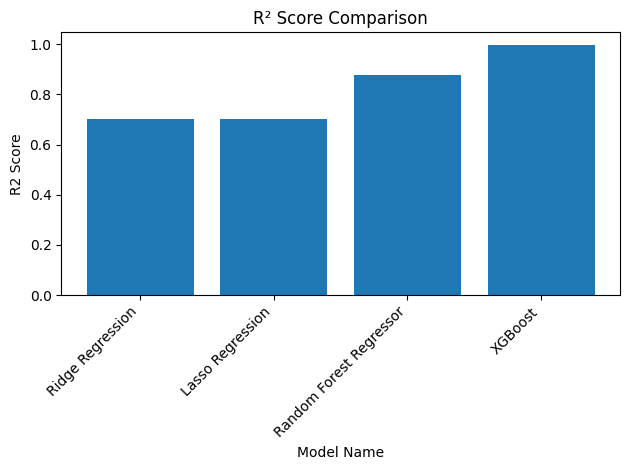

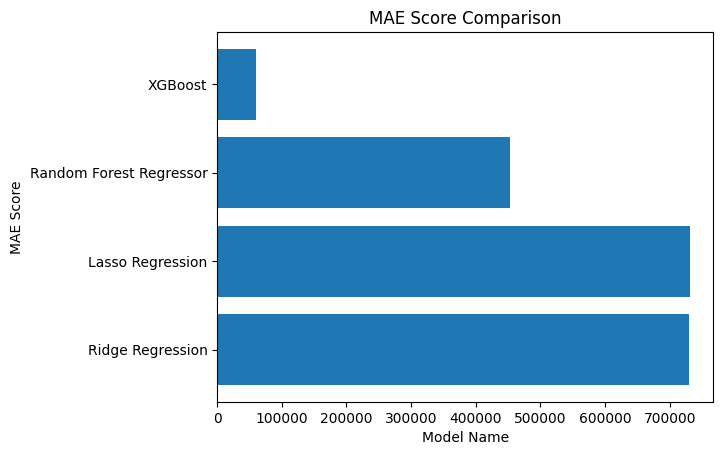

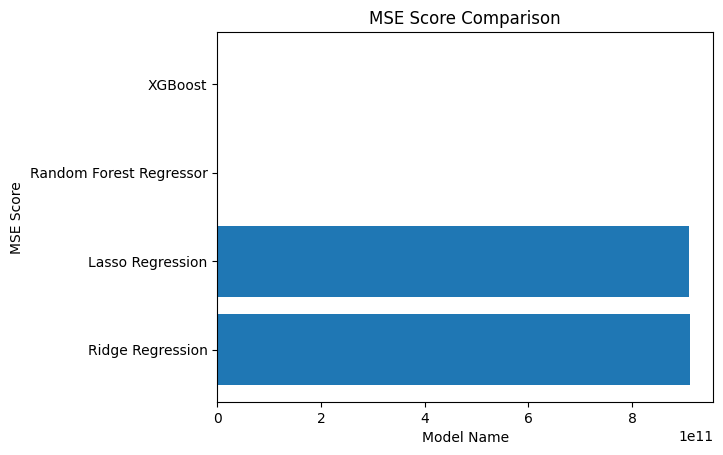

In [59]:
modelname = ['Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'XGBoost']

# Assuming you have these scores from your Ridge and Lasso models:
scoreforR2 = [score_ridge_r2_train, score_lasso_r2_train, score_model2_1, score_model3_1]
scoreforMAE = [score_ridge_mae_train, score_lasso_mae_train, score_model2_2, score_model3_2]
scoreforMSE = [score_ridge_mse_train, score_lasso_mse_train, score_model2_3, score_model3_3]

# R² Score Comparison
plt.bar(modelname, scoreforR2)
plt.xlabel('Model Name')
plt.ylabel('R2 Score')
plt.title('R² Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# MAE Score Comparison
plt.barh(modelname, scoreforMAE)
plt.xlabel('Model Name')
plt.ylabel('MAE Score')
plt.title('MAE Score Comparison')
plt.show()

# MSE Score Comparison (if needed)
plt.barh(modelname, scoreforMSE)
plt.xlabel('Model Name')
plt.ylabel('MSE Score')
plt.title('MSE Score Comparison')
plt.show()


DATA PREDICTION

In [60]:
input_data = (3850, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0)

# Converting input data to numpy array
input_data_numpy = np.asarray(input_data)

# Reshaping the array for a single instance
input_data_numpy_reshape = input_data_numpy.reshape(1, -1)

# Standardizing the input data
std_data = scalar.transform(input_data_numpy_reshape)

# Making predictions using different models
prediction_ridge = ridge_grid.predict(std_data)
print("Using Ridge Regression prediction: ", prediction_ridge)

prediction_lasso = lasso_grid.predict(std_data)
print("Using Lasso Regression prediction: ", prediction_lasso)

prediction_random_forest = model2_refined.predict(std_data)
print("Using Random Forest Regressor prediction: ", prediction_random_forest)

prediction_xgboost = model3.predict(std_data)
print("Using XGBoost prediction: ", prediction_xgboost)

Using Ridge Regression prediction:  [3329454.79709868]
Using Lasso Regression prediction:  [3299781.87725263]
Using Random Forest Regressor prediction:  [2570564.95843434]
Using XGBoost prediction:  [3207081.5]


Saving the file

In [ ]:
filename = 'Property_acquisition_cost_predictor.sav'
pickle.dump(model2_refined,open(filename,'wb'))
loaded_model = pickle.load(open('Property_acquisition_cost_predictor.sav','rb'))

prediction = loaded_model.predict(std_data)